## Import Libraries

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('HousingData.csv')
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


## Data Preprocessing

In [3]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X) 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [7]:
# Print the shapes of the training and testing sets 
print('Training set shape:', X_train.shape, y_train.shape) 
print('Testing set shape:', X_test.shape, y_test.shape)


Training set shape: (354, 13) (354,)
Testing set shape: (152, 13) (152,)


In [8]:
import tensorflow as tf

In [9]:
tf.__version__

'2.16.0-rc0'

In [10]:
# Define the model architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dense(1)) # Output layer

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Input Layer                    Hidden Layer                   Output Layer
 (Input: 13 Features)        (64 Neurons, ReLU)            (1 Neuron, Linear)
       |                             |                            |
   +-------+                     +-------+                   +-------+
   |       |                     |       |                   |       |
   |   64  |                     |   32  |                   |   1   |
   | Neuron|                     | Neuron|                   | Neuron|
   |       |                     |       |                   |       |
   +-------+                     +-------+                   +-------+
     ReLU                          ReLU                        Linear


In [11]:
# Display the model summary 
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [13]:
from keras.callbacks import EarlyStopping 
# Train the mode
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, 
callbacks=[early_stopping])

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 630.3227 - mean_absolute_error: 23.1798 - val_loss: 555.3378 - val_mean_absolute_error: 22.7016
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 653.0199 - mean_absolute_error: 23.4416 - val_loss: 553.3094 - val_mean_absolute_error: 22.6561
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 566.6767 - mean_absolute_error: 21.8459 - val_loss: 551.1924 - val_mean_absolute_error: 22.6085
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 624.0522 - mean_absolute_error: 23.1850 - val_loss: 548.8983 - val_mean_absolute_error: 22.5568
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 627.0939 - mean_absolute_error: 22.8962 - val_loss: 546.4283 - val_mean_absolute_error: 22.5010
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 655.2406 - mean_absolute_error: 23.5178 - val_loss: 543.7344 - val_mean_absolute_error: 22.4400
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 625.8480 - mean_ab

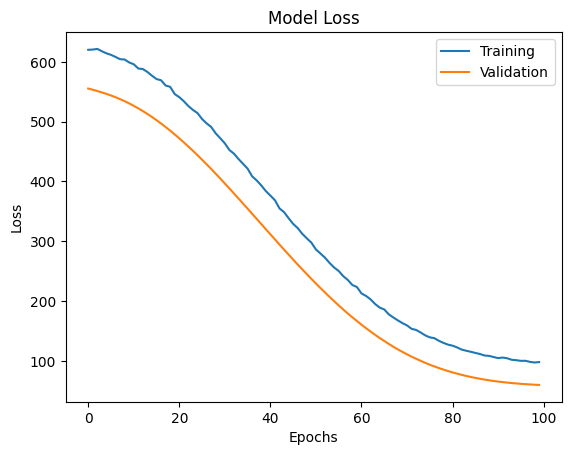

In [15]:
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()


In [16]:
# Evaluate the model 
mae = model.evaluate(X_test, y_test)
print('Mean Absolute Error:', mae)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69.8479 - mean_absolute_error: 5.7626 
Mean Absolute Error: [75.56282806396484, 5.980513095855713]
